# Model Performance Analysis

This notebook analyzes the performance of all trained abnormal-to-normal models across different epochs. We'll examine various metrics including accuracy, F1-score, AUC-ROC, precision, and recall to identify the best performing models and understand training dynamics.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


In [17]:
# Load the model evaluation results
df = pd.read_csv('model_evaluation_results.csv')

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset Shape: (186, 9)

Column Names:
['epoch', 'accuracy', 'f1_score', 'auc_roc', 'precision', 'recall', 'optimal_threshold', 'status', 'evaluation_time']

First few rows:


,epoch,accuracy,f1_score,auc_roc,precision,recall,optimal_threshold,status,evaluation_time
0,0,0.791667,0.796380,0.854252,0.778761,0.814815,0.074676,success,6.03
1,1,0.768519,0.778761,0.812757,0.745763,0.814815,0.062807,success,4.71
2,2,0.754630,0.774468,0.813529,0.716535,0.842593,0.064842,success,5.21
3,3,0.819444,0.818605,0.880658,0.822430,0.814815,0.067727,success,5.22
4,4,0.833333,0.830189,0.895319,0.846154,0.814815,0.069718,success,4.79


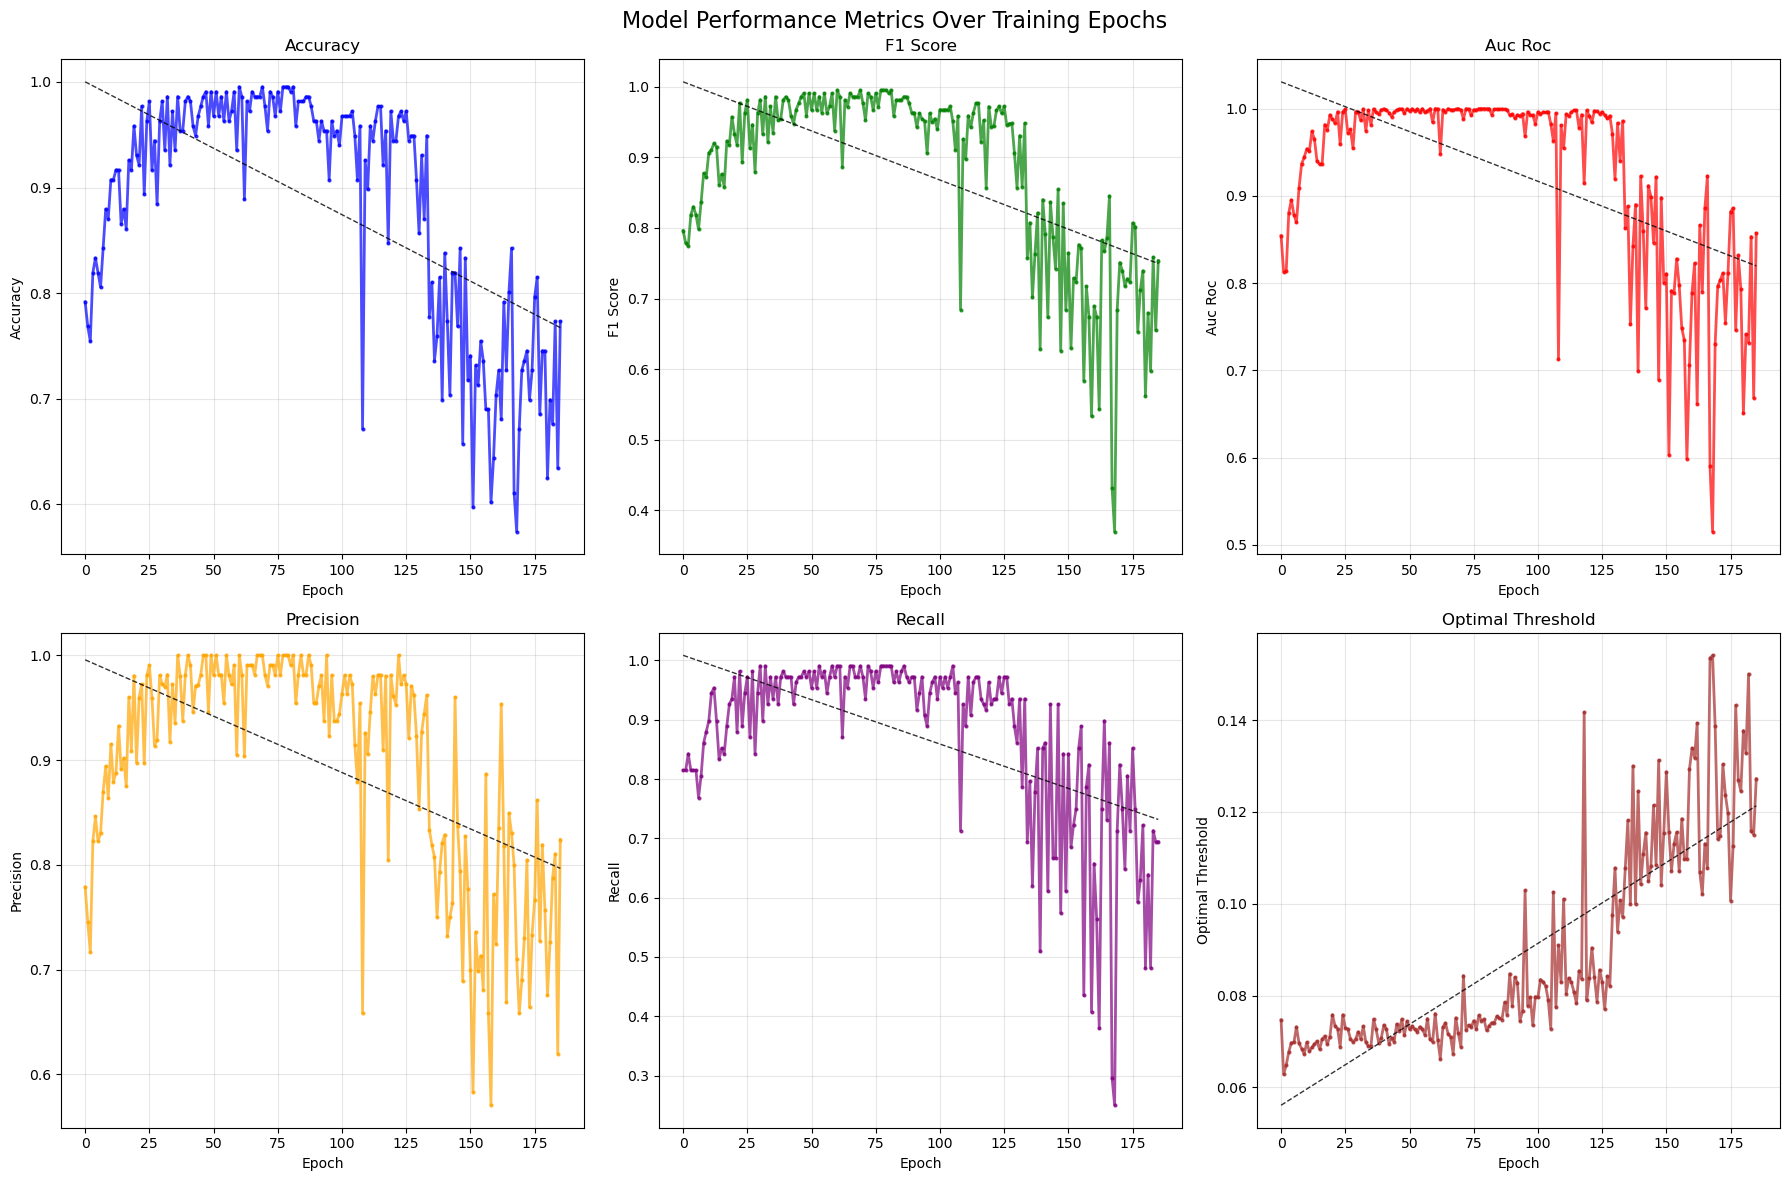

In [18]:
# Plot individual metrics over epochs
if len(df_success) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Model Performance Metrics Over Training Epochs', fontsize=16, y=0.98)
    
    metrics = ['accuracy', 'f1_score', 'auc_roc', 'precision', 'recall', 'optimal_threshold']
    colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']
    
    for i, (metric, color) in enumerate(zip(metrics, colors)):
        row = i // 3
        col = i % 3
        
        axes[row, col].plot(df_success['epoch'], df_success[metric], 
                           color=color, linewidth=2, alpha=0.7, marker='o', markersize=2)
        axes[row, col].set_title(f'{metric.replace("_", " ").title()}', fontsize=12)
        axes[row, col].set_xlabel('Epoch')
        axes[row, col].set_ylabel(metric.replace("_", " ").title())
        axes[row, col].grid(True, alpha=0.3)
        
        # Add trend line
        z = np.polyfit(df_success['epoch'], df_success[metric], 1)
        p = np.poly1d(z)
        axes[row, col].plot(df_success['epoch'], p(df_success['epoch']), 
                           "--", alpha=0.8, color='black', linewidth=1)
    
    plt.tight_layout()
    plt.show()
else:
    print("No data to plot!")

In [19]:
# Best performing models
if len(df_success) > 0:
    print("="*60)
    print("BEST PERFORMING MODELS")
    print("="*60)
    
    metrics_to_analyze = ['accuracy', 'f1_score', 'auc_roc', 'precision', 'recall']
    
    for metric in metrics_to_analyze:
        best_idx = df_success[metric].idxmax()
        best_model = df_success.loc[best_idx]
        print(f"\nBest {metric.replace('_', ' ').title()}:")
        print(f"  Epoch: {best_model['epoch']}")
        print(f"  {metric.replace('_', ' ').title()}: {best_model[metric]:.4f}")
        print(f"  AUC-ROC: {best_model['auc_roc']:.4f}")
        print(f"  Accuracy: {best_model['accuracy']:.4f}")
        print(f"  F1-Score: {best_model['f1_score']:.4f}")
        print(f"  Evaluation Time: {best_model['evaluation_time']:.2f}s")
    
    # Overall best model (using AUC-ROC as primary metric)
    overall_best_idx = df_success['auc_roc'].idxmax()
    overall_best = df_success.loc[overall_best_idx]
    
    print(f"\n{'='*60}")
    print("OVERALL BEST MODEL (Based on AUC-ROC)")
    print(f"{'='*60}")
    print(f"Epoch: {overall_best['epoch']}")
    print(f"AUC-ROC: {overall_best['auc_roc']:.4f}")
    print(f"Accuracy: {overall_best['accuracy']:.4f}")
    print(f"F1-Score: {overall_best['f1_score']:.4f}")
    print(f"Precision: {overall_best['precision']:.4f}")
    print(f"Recall: {overall_best['recall']:.4f}")
    print(f"Optimal Threshold: {overall_best['optimal_threshold']:.4f}")
    print(f"Evaluation Time: {overall_best['evaluation_time']:.2f}s")

BEST PERFORMING MODELS

Best Accuracy:
  Epoch: 60
  Accuracy: 0.9954
  AUC-ROC: 1.0000
  Accuracy: 0.9954
  F1-Score: 0.9953
  Evaluation Time: 4.74s

Best F1 Score:
  Epoch: 60
  F1 Score: 0.9953
  AUC-ROC: 1.0000
  Accuracy: 0.9954
  F1-Score: 0.9953
  Evaluation Time: 4.74s

Best Auc Roc:
  Epoch: 60
  Auc Roc: 1.0000
  AUC-ROC: 1.0000
  Accuracy: 0.9954
  F1-Score: 0.9953
  Evaluation Time: 4.74s

Best Precision:
  Epoch: 36
  Precision: 1.0000
  AUC-ROC: 0.9996
  Accuracy: 0.9861
  F1-Score: 0.9859
  Evaluation Time: 4.27s

Best Recall:
  Epoch: 30
  Recall: 0.9907
  AUC-ROC: 0.9964
  Accuracy: 0.9815
  F1-Score: 0.9817
  Evaluation Time: 4.15s

OVERALL BEST MODEL (Based on AUC-ROC)
Epoch: 60
AUC-ROC: 1.0000
Accuracy: 0.9954
F1-Score: 0.9953
Precision: 1.0000
Recall: 0.9907
Optimal Threshold: 0.0761
Evaluation Time: 4.74s


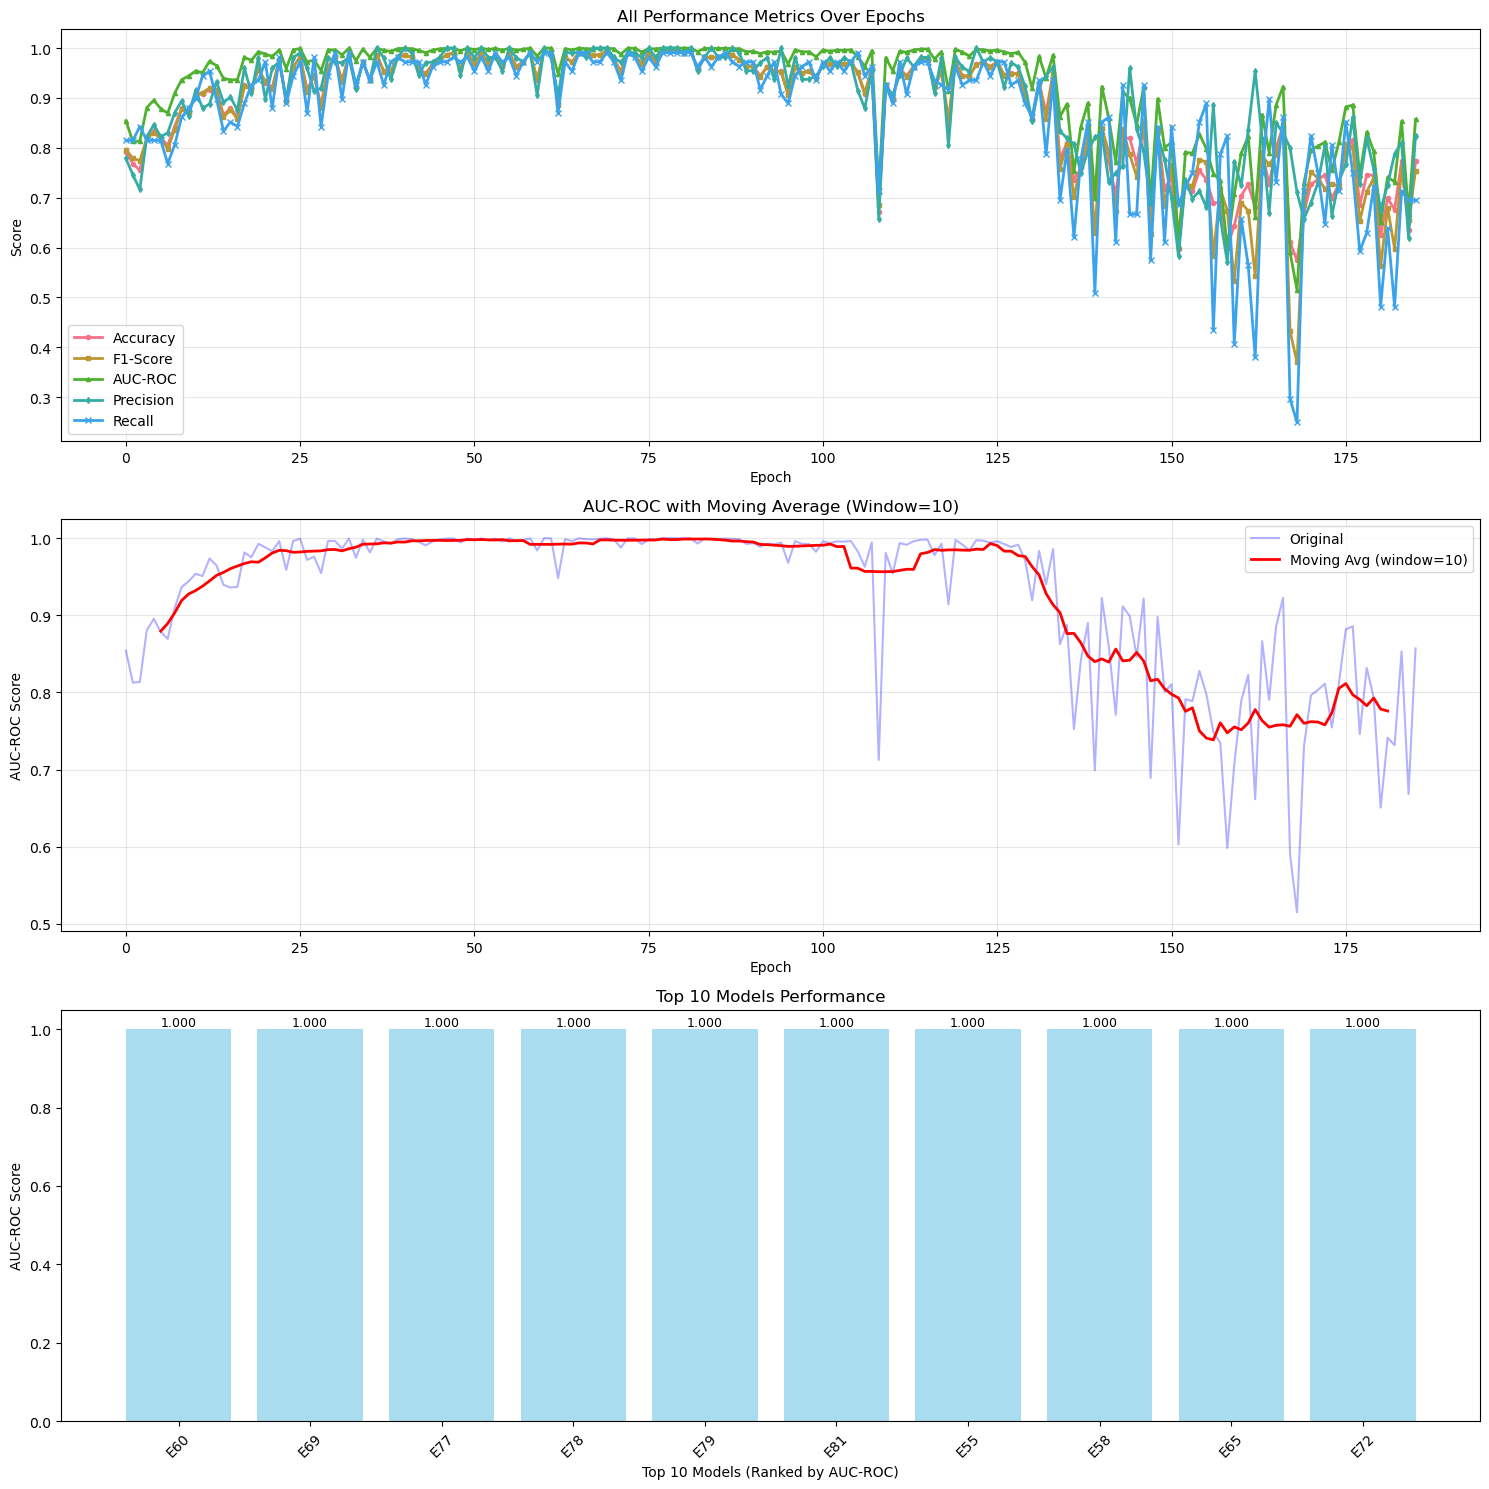

In [20]:
# Combined performance plot
if len(df_success) > 0:
    plt.figure(figsize=(15, 15))
    
    # Main plot with multiple metrics
    plt.subplot(3, 1, 1)
    plt.plot(df_success['epoch'], df_success['accuracy'], label='Accuracy', linewidth=2, marker='o', markersize=3)
    plt.plot(df_success['epoch'], df_success['f1_score'], label='F1-Score', linewidth=2, marker='s', markersize=3)
    plt.plot(df_success['epoch'], df_success['auc_roc'], label='AUC-ROC', linewidth=2, marker='^', markersize=3)
    plt.plot(df_success['epoch'], df_success['precision'], label='Precision', linewidth=2, marker='d', markersize=3)
    plt.plot(df_success['epoch'], df_success['recall'], label='Recall', linewidth=2, marker='x', markersize=4)
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.title('All Performance Metrics Over Epochs')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Moving average of AUC-ROC
    plt.subplot(3, 1, 2)
    window_size = 10
    if len(df_success) >= window_size:
        moving_avg = df_success['auc_roc'].rolling(window=window_size, center=True).mean()
        plt.plot(df_success['epoch'], df_success['auc_roc'], alpha=0.3, color='blue', label='Original')
        plt.plot(df_success['epoch'], moving_avg, color='red', linewidth=2, label=f'Moving Avg (window={window_size})')
        plt.xlabel('Epoch')
        plt.ylabel('AUC-ROC Score')
        plt.title(f'AUC-ROC with Moving Average (Window={window_size})')
        plt.legend()
        plt.grid(True, alpha=0.3)
    else:
        plt.plot(df_success['epoch'], df_success['auc_roc'], color='blue', linewidth=2)
        plt.xlabel('Epoch')
        plt.ylabel('AUC-ROC Score')
        plt.title('AUC-ROC Over Epochs')
        plt.grid(True, alpha=0.3)
    
    # Top 10 models by AUC-ROC
    plt.subplot(3, 1, 3)
    top_10 = df_success.nlargest(10, 'auc_roc')
    bars = plt.bar(range(len(top_10)), top_10['auc_roc'], color='skyblue', alpha=0.7)
    plt.xlabel('Top 10 Models (Ranked by AUC-ROC)')
    plt.ylabel('AUC-ROC Score')
    plt.title('Top 10 Models Performance')
    plt.xticks(range(len(top_10)), [f"E{int(epoch)}" for epoch in top_10['epoch']], rotation=45)
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

# Loss Components and Learning Rate Analysis

Now let's analyze the loss components and learning rates for all trained models. This data was calculated by evaluating each saved model on a subset of the dataset.

## 📚 Understanding Loss Components

### What Each Loss Means and How It's Calculated

Our abnormal-to-normal (A2N) generator uses multiple loss components to train effectively. Here's a detailed breakdown:

---

### 🎯 **Total Loss**
- **What it is**: The weighted sum of all individual loss components
- **Formula**: `Total = λ₁×Identity + λ₂×Healing + λ₃×Adversarial + λ₄×Segmentation + λ₅×Perceptual`
- **When minimized**: Achieves the best overall balance between all training objectives
- **Goal**: Ensure the model learns all aspects without one loss dominating others

---

### 🔄 **Identity Loss (L1/MSE)**
- **What it is**: Measures how well normal images remain unchanged when passed through the generator
- **Formula**: `L1(normal_input, healed_normal) = |normal_input - healed_normal|`
- **When minimized**: Normal images are preserved without unwanted modifications
- **Goal**: Prevent the generator from corrupting healthy tissue in normal OCT scans

---

### 🩺 **Healing Loss (L1/MSE)**
- **What it is**: Measures how different the healed abnormal images are from the original abnormal ones
- **Formula**: `L1(abnormal_input, healed_abnormal) = |abnormal_input - healed_abnormal|`
- **When minimized**: The generator learns to make meaningful changes to abnormal regions
- **Goal**: Encourage the model to "heal" pathological areas (CNV, DME, DRUSEN → NORMAL)

---

### ⚔️ **Adversarial Loss (GAN Loss)**
- **What it is**: Forces the generator to create realistic images that fool the discriminator
- **Formula**: `BCE(discriminator(healed_images), real_labels)`
- **When minimized**: Generated images become indistinguishable from real normal images
- **Goal**: Ensure healed images look like authentic, natural OCT scans

---

### 🎭 **Discriminator Loss**
- **What it is**: Trains the discriminator to distinguish between real and generated images
- **Formula**: `BCE(D(real), 1) + BCE(D(fake_normal), 0) + BCE(D(fake_abnormal), 0)`
- **When minimized**: Discriminator becomes better at detecting fake images
- **Goal**: Provide strong feedback to push the generator to create more realistic outputs

---

### 🔍 **Segmentation Loss**
- **What it is**: Ensures the generator focuses healing on the actual abnormal regions
- **Formula**: Based on pixel-wise differences in detected abnormal areas
- **When minimized**: Healing is targeted only to pathological regions, preserving healthy areas
- **Goal**: Precise, localized healing rather than global image changes

---

### 👁️ **Perceptual Loss (VGG/Feature-based)**
- **What it is**: Compares high-level features using a pre-trained network (like VGG)
- **Formula**: `MSE(VGG_features(real), VGG_features(generated))`
- **When minimized**: Generated images have similar semantic content and structure
- **Goal**: Preserve important anatomical structures and textures in OCT images

---

### 🎛️ **Learning Rates**
- **Generator LR**: Controls how fast the generator learns to heal abnormal images
- **Discriminator LR**: Controls how fast the discriminator learns to detect fakes
- **Decay Schedule**: Both start at 0.0002 and decay after epoch 100 to stabilize training

---

### 🏆 **Training Success Indicators**

**Good Training Signs:**
- Total loss decreasing over time
- Identity loss staying low (normal images preserved)
- Healing loss moderate but decreasing (abnormal images being changed)
- Adversarial loss balanced (not too high/low)
- Discriminator loss around 0.5-0.7 (balanced game)

**Warning Signs:**
- Total loss oscillating wildly
- Identity loss increasing (corrupting normal images)
- Adversarial loss near 0 (discriminator too weak) or very high (generator failing)
- Any loss exploding to very large values

In [22]:
# Load the loss and learning rate data
try:
    df_losses = pd.read_csv('model_losses_lr.csv')
    print("Loss data loaded successfully!")
    print("Dataset Shape:", df_losses.shape)
    print("\nColumn Names:")
    print(df_losses.columns.tolist())
    print("\nFirst few rows:")
    print(df_losses.head())
    
    # Check for successful evaluations
    df_losses_success = df_losses[df_losses['status'] == 'success'].copy()
    print(f"\nSuccessful evaluations: {len(df_losses_success)} out of {len(df_losses)}")
    
    if len(df_losses_success) > 0:
        # Convert numeric columns
        numeric_cols = ['epoch', 'evaluation_time', 'samples_evaluated', 'generator_lr', 'discriminator_lr',
                       'total_loss', 'identity_loss', 'healing_loss', 'adversarial_loss', 
                       'segmentation_loss', 'perceptual_loss', 'discriminator_loss']
        
        for col in numeric_cols:
            if col in df_losses_success.columns:
                df_losses_success[col] = pd.to_numeric(df_losses_success[col], errors='coerce')
        
        print("\nData types after conversion:")
        print(df_losses_success.dtypes)
    
except FileNotFoundError:
    print("model_losses_lr.csv file not found!")
    df_losses = None
    df_losses_success = None
except Exception as e:
    print(f"Error loading loss data: {e}")
    df_losses = None
    df_losses_success = None

Loss data loaded successfully!
Dataset Shape: (186, 14)

Column Names:
['epoch', 'model_file', 'evaluation_time', 'samples_evaluated', 'generator_lr', 'discriminator_lr', 'total_loss', 'identity_loss', 'healing_loss', 'adversarial_loss', 'segmentation_loss', 'perceptual_loss', 'discriminator_loss', 'status']

First few rows:
   epoch                model_file  evaluation_time  samples_evaluated  \
0      0  abnormal_to_normal_0.pth             0.84                  3   
1      1  abnormal_to_normal_1.pth             0.16                  3   
2      2  abnormal_to_normal_2.pth             0.19                  3   
3      3  abnormal_to_normal_3.pth             0.21                  3   
4      4  abnormal_to_normal_4.pth             0.20                  3   

   generator_lr  discriminator_lr  total_loss  identity_loss  healing_loss  \
0        0.0002            0.0002    3.675936       0.099088      0.100144   
1        0.0002            0.0002    2.540296       0.066263      0.0795

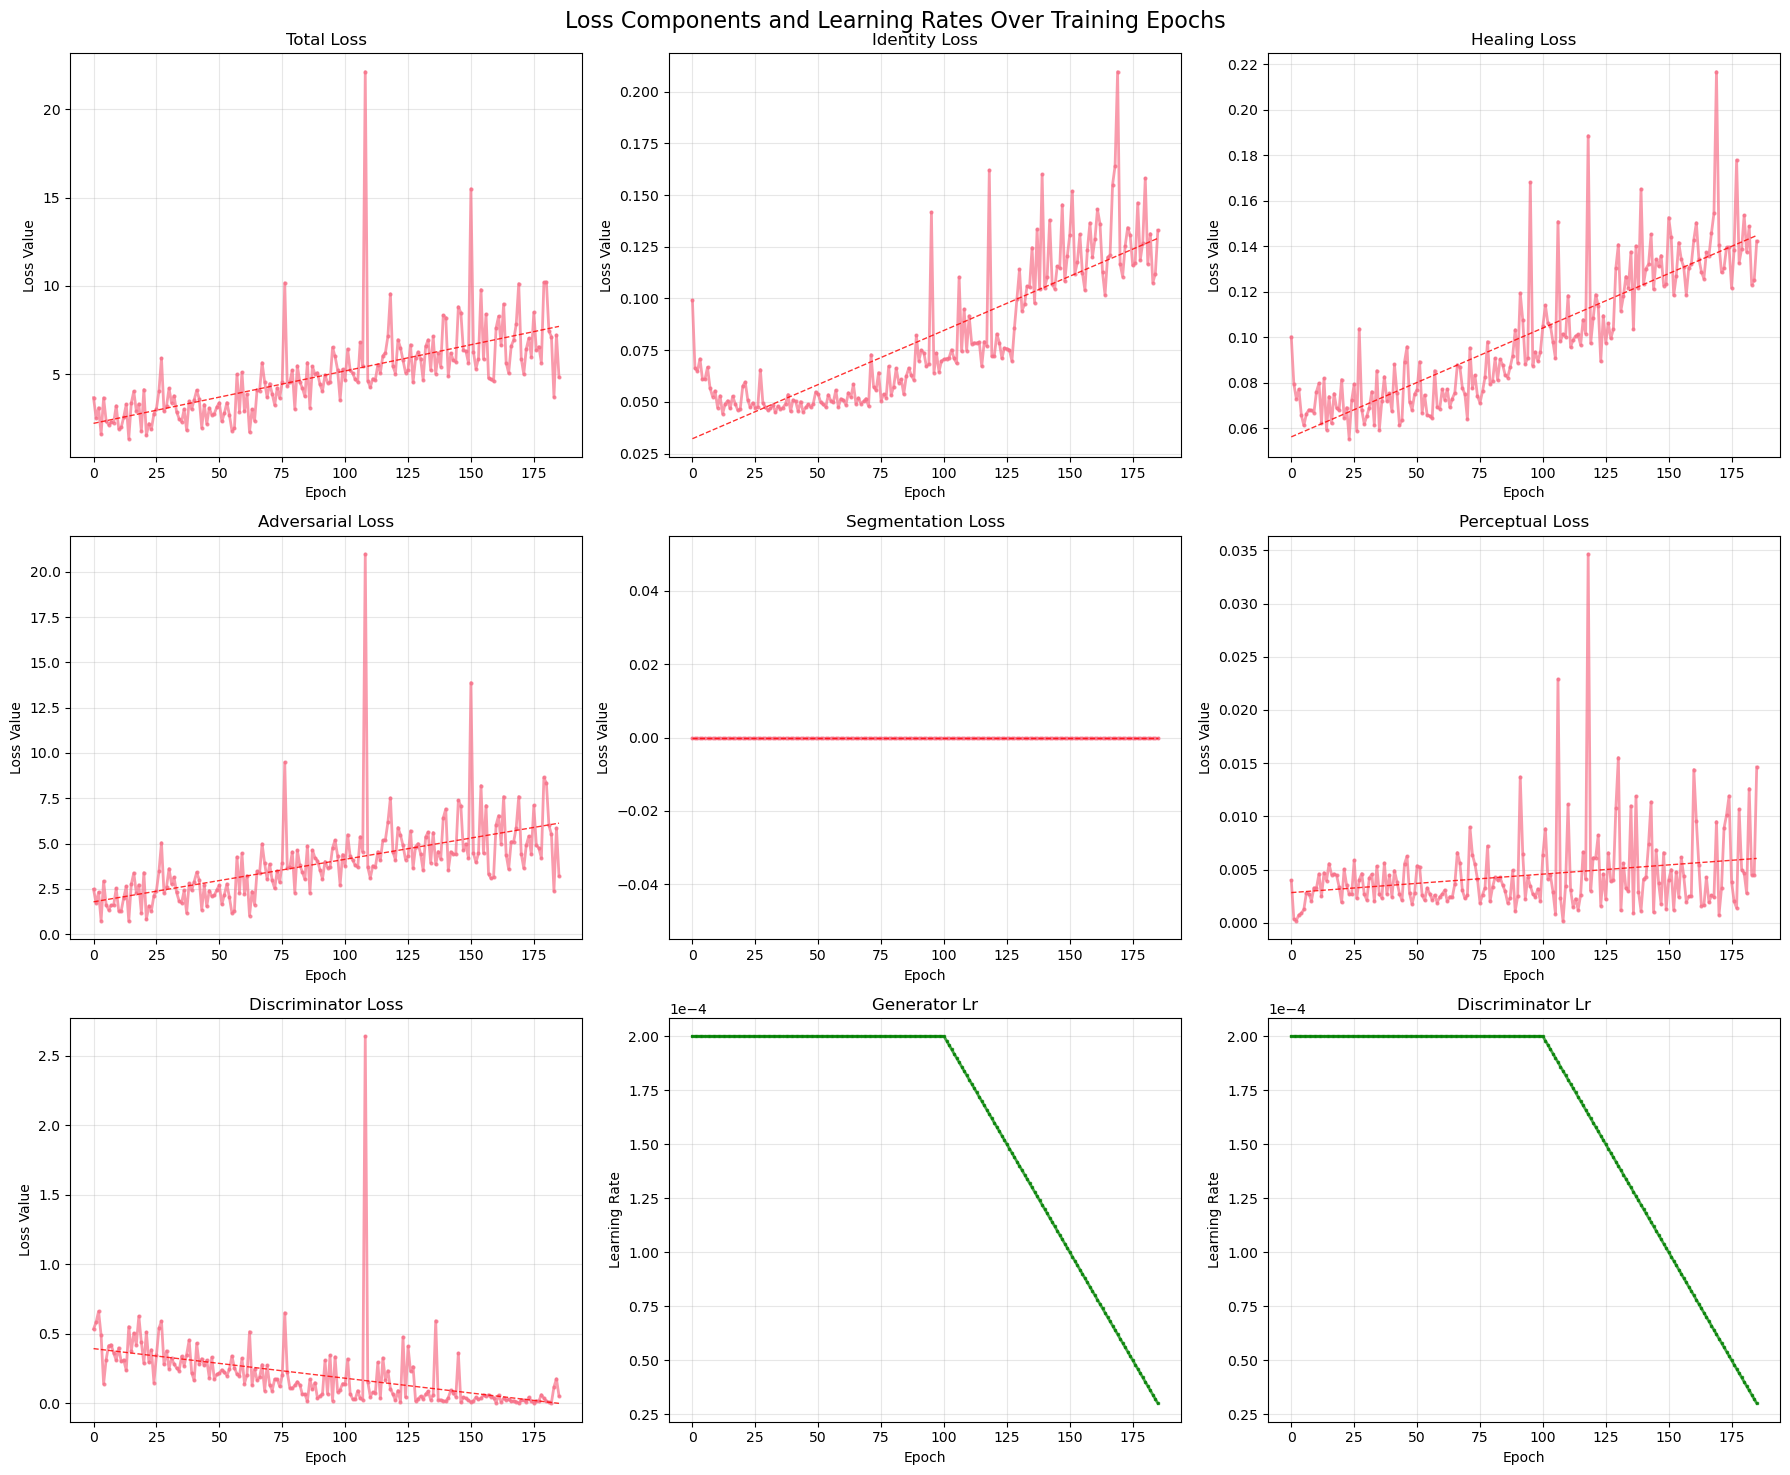

In [23]:
# Plot all loss components over epochs
if df_losses_success is not None and len(df_losses_success) > 0:
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    fig.suptitle('Loss Components and Learning Rates Over Training Epochs', fontsize=16, y=0.98)
    
    # Loss components to plot
    loss_components = ['total_loss', 'identity_loss', 'healing_loss', 'adversarial_loss', 
                      'segmentation_loss', 'perceptual_loss', 'discriminator_loss']
    
    # Learning rates
    lr_components = ['generator_lr', 'discriminator_lr']
    
    # Plot loss components
    for i, loss_name in enumerate(loss_components):
        row = i // 3
        col = i % 3
        
        if loss_name in df_losses_success.columns:
            axes[row, col].plot(df_losses_success['epoch'], df_losses_success[loss_name], 
                               linewidth=2, alpha=0.7, marker='o', markersize=2)
            axes[row, col].set_title(f'{loss_name.replace("_", " ").title()}', fontsize=12)
            axes[row, col].set_xlabel('Epoch')
            axes[row, col].set_ylabel('Loss Value')
            axes[row, col].grid(True, alpha=0.3)
            
            # Add trend line
            if len(df_losses_success) > 1:
                z = np.polyfit(df_losses_success['epoch'], df_losses_success[loss_name], 1)
                p = np.poly1d(z)
                axes[row, col].plot(df_losses_success['epoch'], p(df_losses_success['epoch']), 
                                   "--", alpha=0.8, color='red', linewidth=1)
    
    # Plot learning rates in the remaining subplots
    for i, lr_name in enumerate(lr_components):
        row = 2
        col = i + 1
        
        if lr_name in df_losses_success.columns:
            axes[row, col].plot(df_losses_success['epoch'], df_losses_success[lr_name], 
                               linewidth=2, alpha=0.7, marker='s', markersize=2, color='green')
            axes[row, col].set_title(f'{lr_name.replace("_", " ").title()}', fontsize=12)
            axes[row, col].set_xlabel('Epoch')
            axes[row, col].set_ylabel('Learning Rate')
            axes[row, col].grid(True, alpha=0.3)
            axes[row, col].ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    
    plt.tight_layout()
    plt.show()
else:
    print("No loss data available to plot!")

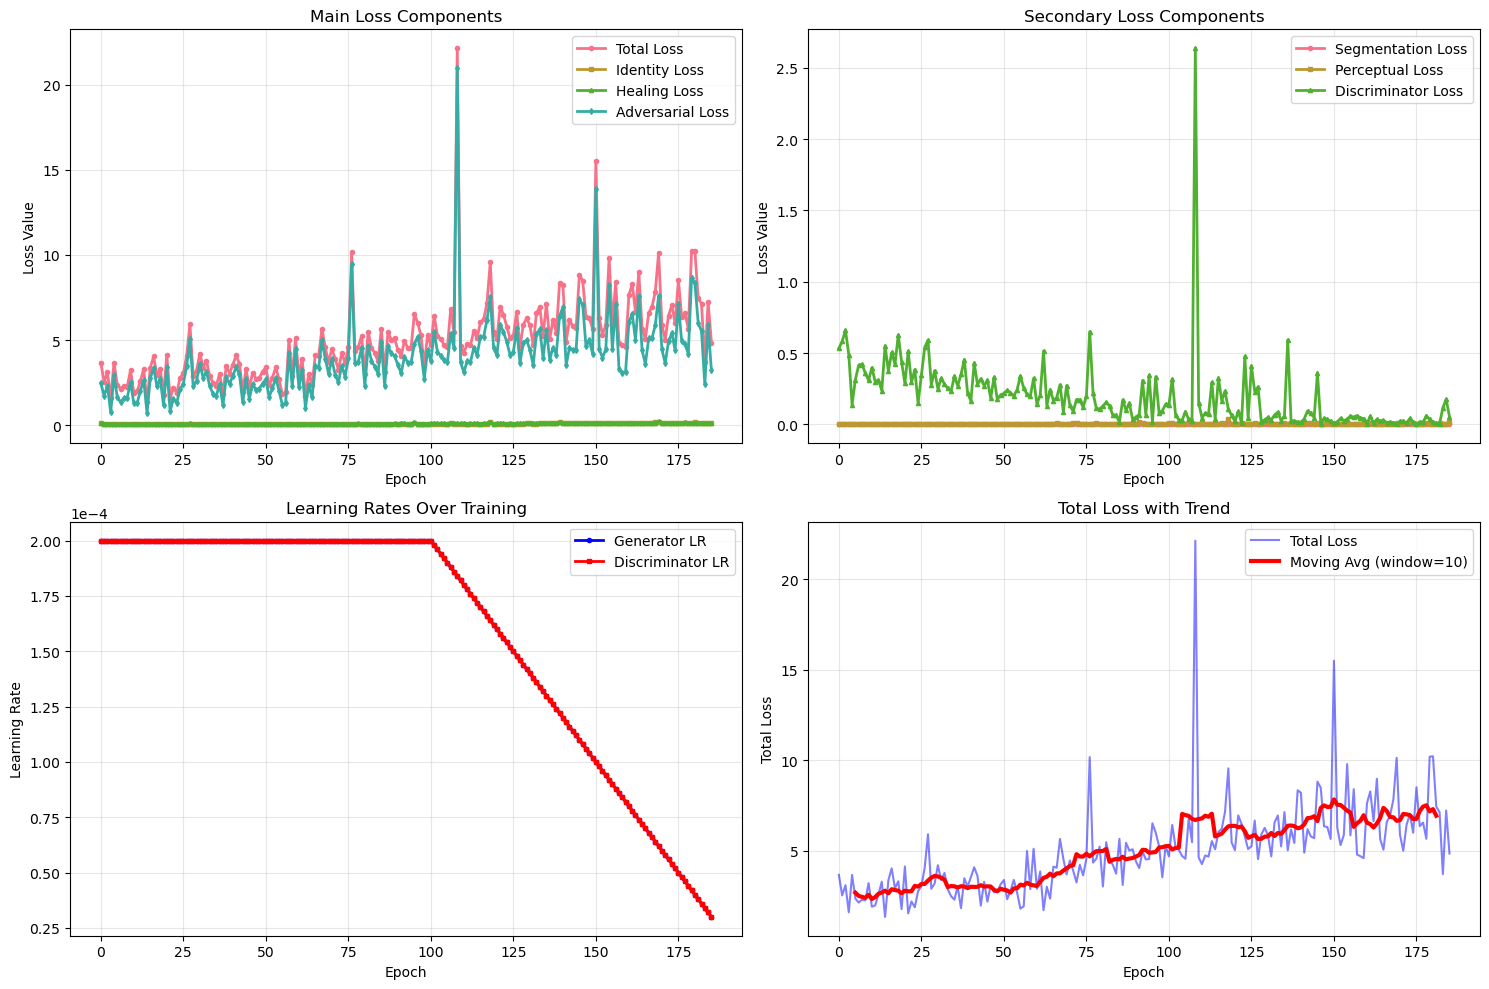

In [24]:
# Combined loss components plot
if df_losses_success is not None and len(df_losses_success) > 0:
    plt.figure(figsize=(15, 10))
    
    # Main loss components subplot
    plt.subplot(2, 2, 1)
    plt.plot(df_losses_success['epoch'], df_losses_success['total_loss'], label='Total Loss', linewidth=2, marker='o', markersize=3)
    plt.plot(df_losses_success['epoch'], df_losses_success['identity_loss'], label='Identity Loss', linewidth=2, marker='s', markersize=3)
    plt.plot(df_losses_success['epoch'], df_losses_success['healing_loss'], label='Healing Loss', linewidth=2, marker='^', markersize=3)
    plt.plot(df_losses_success['epoch'], df_losses_success['adversarial_loss'], label='Adversarial Loss', linewidth=2, marker='d', markersize=3)
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.title('Main Loss Components')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Secondary loss components subplot
    plt.subplot(2, 2, 2)
    plt.plot(df_losses_success['epoch'], df_losses_success['segmentation_loss'], label='Segmentation Loss', linewidth=2, marker='o', markersize=3)
    plt.plot(df_losses_success['epoch'], df_losses_success['perceptual_loss'], label='Perceptual Loss', linewidth=2, marker='s', markersize=3)
    plt.plot(df_losses_success['epoch'], df_losses_success['discriminator_loss'], label='Discriminator Loss', linewidth=2, marker='^', markersize=3)
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.title('Secondary Loss Components')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Learning rate subplot
    plt.subplot(2, 2, 3)
    plt.plot(df_losses_success['epoch'], df_losses_success['generator_lr'], label='Generator LR', linewidth=2, marker='o', markersize=3, color='blue')
    plt.plot(df_losses_success['epoch'], df_losses_success['discriminator_lr'], label='Discriminator LR', linewidth=2, marker='s', markersize=3, color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rates Over Training')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    
    # Total loss with moving average
    plt.subplot(2, 2, 4)
    plt.plot(df_losses_success['epoch'], df_losses_success['total_loss'], alpha=0.5, color='blue', label='Total Loss')
    
    # Add moving average if we have enough data points
    window_size = min(10, len(df_losses_success) // 5)
    if window_size >= 3:
        moving_avg = df_losses_success['total_loss'].rolling(window=window_size, center=True).mean()
        plt.plot(df_losses_success['epoch'], moving_avg, color='red', linewidth=3, label=f'Moving Avg (window={window_size})')
    
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Total Loss with Trend')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()